# Classification Network

We'll learn to build a classification network using PyTorch. Broadly, it involved the following steps:

- [Data Preparation](#data-preparation)
- Model Design
  - [V0](#model-architecture-v0)
  - [V1](#model-architecture-v1)
  - [V2](#model-architecture-v2)
- Training
  - [V0](#training)
  - [V1](#training-v1)
  - [V2](#training-v2)
- Making Predictions
  - [V0](#make-predictions-and-evaluate-model)
  - [V1](#evaluate-v1)
  - [V2](#evaluate-v2)
- [Tricks to Improve Predictions](#model-improvements)
- [Introduction to Non-Linearities](#model-with-non-linearity)
- [Learning Non-Linear Functions](#training-v2)
- [Multi-class Classification](#multi-class-classification)

We'll follow the [PyTorch Classification](https://www.learnpytorch.io/02_pytorch_classification/) tutorial by [@mrdbourke](https://github.com/mrdbourke/pytorch-deep-learning)

# Import Modules

In [133]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split

# Data Preparation

## Generation

In [101]:
# Define a random seed for training predictability
SEED = 3

# Make 1000 samples
n_samples = 1000

noise = 0.03

# Create noisy circles
X, y = make_circles(n_samples, noise=noise, random_state=SEED)

print('\nSamples')
print('--------')
print(f'X[:5]: {X[:5]}')
print(f'\ny[:5]: {y[:5]}')


Samples
--------
X[:5]: [[-0.14262555  0.76735775]
 [-0.80555499 -0.08834659]
 [ 0.33596039 -0.65704399]
 [-0.77683638  0.57673511]
 [ 0.37742784  0.69483248]]

y[:5]: [1 1 1 0 1]


## Exploration

In [102]:
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

print('Samples')
display(circles.head(10))

print('Label Counts')
print('------------')
display(circles.label.value_counts())

Samples


,X1,X2,label
0,-0.142626,0.767358,1
1,-0.805555,-0.088347,1
2,0.335960,-0.657044,1
3,-0.776836,0.576735,0
4,0.377428,0.694832,1
5,-0.661527,-0.430946,1
6,-0.297184,0.735692,1
7,-0.796143,-0.035503,1
8,0.466002,-0.934256,0
9,1.019159,-0.031567,0


Label Counts
------------


label
1    500
0    500
Name: count, dtype: int64

## Visualization

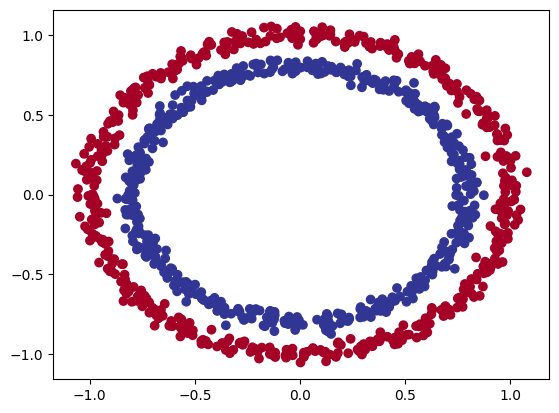

In [103]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Training and Test Splits

In [104]:
print('Dataset Shapes')
print('--------------')
print(f'X.shape: {X.shape} Y.shape: {y.shape}')

print('\nSingle Data Item')
print('--------------')
print(f'X[0]: {X[0]}')
print(f'\ny[0]: {y[0]}')
print(f'X[0].shape: {X[0].shape} Y[0].shape: {y[0].shape}')

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print('\nSample Tensors')
print('-----------------')
print(f'X[:5]: {X[:5]}')
print(f'\ny[:5]: {y[:5]}')

Dataset Shapes
--------------
X.shape: (1000, 2) Y.shape: (1000,)

Single Data Item
--------------
X[0]: [-0.14262555  0.76735775]

y[0]: 1
X[0].shape: (2,) Y[0].shape: ()

Sample Tensors
-----------------
X[:5]: tensor([[-0.1426,  0.7674],
        [-0.8056, -0.0883],
        [ 0.3360, -0.6570],
        [-0.7768,  0.5767],
        [ 0.3774,  0.6948]])

y[:5]: tensor([1., 1., 1., 0., 1.])


In [105]:
train_split, test_split = 0.8, 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=SEED)

print('Training and Test Splits')
print('-------------------------')
print(f'X_train: {len(X_train)}')
print(f'y_train: {len(y_train)}')
print(f'\nX_test: {len(X_test)}')
print(f'y_test: {len(y_test)}')

Training and Test Splits
-------------------------
X_train: 800
y_train: 800

X_test: 200
y_test: 200


# Model Design

## Device Selection

In [106]:
DEVICE = 'cpu'

if torch.cuda.is_available():
    DEVICE = 'cuda'
elif torch.backends.mps.is_available():
    DEVICE = 'mps'

print(f'Device: {DEVICE}')

Device: mps


## Model Architecture V0

In [107]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)

        return x

model_0 = CircleModelV0().to(DEVICE)
print('Model Architecture')
print('------------------')
print(f'{model_0}')

print('\nModel Parameters')
print(f'--------------------------------')
for (name, param) in model_0.state_dict().items():
    print(f'{name}: {param}')

xt = torch.randn(2, 2, device=DEVICE)
yt = model_0(xt)

print('\nInputs and Outputs')
print('-------------------')
print(f'Input: {xt}')
print(f'Output: {yt}')
print(f'Input Shape: {xt.shape} Output Shape: {yt.shape}')

Model Architecture
------------------
CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Model Parameters
--------------------------------
layer_1.weight: tensor([[-0.7011, -0.5578],
        [-0.3029, -0.6690],
        [-0.0401, -0.6221],
        [ 0.3845,  0.3446],
        [ 0.1335,  0.5485]], device='mps:0')


layer_1.bias: tensor([-0.0693,  0.4235, -0.4952, -0.1393, -0.6305], device='mps:0')
layer_2.weight: tensor([[-0.0363, -0.2901,  0.4018,  0.3107,  0.3353]], device='mps:0')
layer_2.bias: tensor([0.1327], device='mps:0')

Inputs and Outputs
-------------------
Input: tensor([[ 0.2221, -0.9873],
        [-0.6003,  0.6860]], device='mps:0')
Output: tensor([[-0.6354],
        [-0.4231]], device='mps:0', grad_fn=<LinearBackward0>)
Input Shape: torch.Size([2, 2]) Output Shape: torch.Size([2, 1])


## Untrained Predictions

In [108]:
untrained_preds = model_0(X_test.to(DEVICE))

print('Untrained Predictions')
print('--------------------')
print(f'X_test.shape: {X_test.shape}')
print(f'Predictions: {untrained_preds.shape}')
print(f'y_test.shape: {y_test.shape}')
print(f'Predictions[:10]: {untrained_preds[:10]}')
print(f'y_test[:10]: {y_test[:10]}')

Untrained Predictions
--------------------
X_test.shape: torch.Size([200, 2])
Predictions: torch.Size([200, 1])
y_test.shape: torch.Size([200])
Predictions[:10]: tensor([[-0.7239],
        [-0.5810],
        [-0.4996],
        [-0.5282],
        [-0.7313],
        [-0.6707],
        [-0.6511],
        [-0.2740],
        [-0.5875],
        [-0.6757]], device='mps:0', grad_fn=<SliceBackward0>)
y_test[:10]: tensor([1., 0., 0., 1., 1., 0., 1., 0., 1., 0.])


## Loss Function, Optimizer and Evaluation Metrics

This is a binary classification problem. We will use a binary crossentropy loss function which computes the loss between predicted and true distributions.

In [109]:
LR = 0.1

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr=LR, params=model_0.parameters())

print('\nLoss Function: BCE')

print('\nOptimizer (SGD)')
print('------------------')
print(f'learning_rate: {LR}')

def accuracy_fn(y_true, y_pred):
    matches = torch.eq(y_true, y_pred).sum()
    acc = (matches / len(y_true))*100.0

    return acc

y_true_raw = torch.rand(10)
y_pred = torch.rand(10).round()
accuracy = accuracy_fn(y_true, y_pred)

print('Accuracy Function')
print('-----------------')
print(f'y_true: {y_true}')
print(f'y_pred: {y_pred}')
print(f'\nAccuracy: {accuracy}')


Loss Function: BCE

Optimizer (SGD)
------------------
learning_rate: 0.1
Accuracy Function
-----------------
y_true: tensor([0., 1., 1., 0., 0., 1., 0., 0., 0., 1.])
y_pred: tensor([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.])

Accuracy: 50.0


# Training

## Model Output to Target Classes

In [110]:
y_logits = model_0(X_test[:5].to(DEVICE)).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))
accuracy = accuracy_fn(y_test[:5].to(DEVICE), y_pred)

print('\nModel Output to Target Classes')
print('-------------------------------')
print(f'Logits: {y_logits}')
print(f'Assignments: {y_pred}')
print(f'Labels: {y_test[:5]}')
print(f'Accuracy: {accuracy}')


Model Output to Target Classes
-------------------------------
Logits: tensor([-0.7239, -0.5810, -0.4996, -0.5282, -0.7313], device='mps:0',
       grad_fn=<SqueezeBackward0>)
Assignments: tensor([0., 0., 0., 0., 0.], device='mps:0', grad_fn=<RoundBackward0>)
Labels: tensor([1., 0., 0., 1., 1.])
Accuracy: 40.0


## Loop

In [111]:
torch.manual_seed(SEED)

EPOCHS = 100

X_train, y_train = X_train.to(DEVICE), y_train.to(DEVICE)
X_test, y_test = X_test.to(DEVICE), y_test.to(DEVICE)

print('Training Loop')
print('-------------')

for epoch in range(EPOCHS):
    ### Training
    model_0.train()

    # 1. Forward Pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Compute Loss and Accuracy
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred)

    # 3. Clear Optimizer Gradients
    optimizer.zero_grad()

    # 4. Backward Pass
    loss.backward()

    # 5. Update Weights
    optimizer.step()

    ### Evaluation
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward Pass
        y_logits = model_0(X_test).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        # 2. Compute Loss and Accuracy
        val_loss = loss_fn(y_logits, y_test)
        val_accuracy = accuracy_fn(y_test, y_pred)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} Accuracy: {accuracy:.5f} | Val Loss: {val_loss:.5f} Val Accuracy: {val_accuracy:.5f}')

Training Loop
-------------
Epoch: 9 | Loss: 0.70435 Accuracy: 46.50000 | Val Loss: 0.71258 Val Accuracy: 41.00000
Epoch: 19 | Loss: 0.69787 Accuracy: 44.12500 | Val Loss: 0.70281 Val Accuracy: 42.50000
Epoch: 29 | Loss: 0.69546 Accuracy: 46.00000 | Val Loss: 0.69841 Val Accuracy: 47.50000
Epoch: 39 | Loss: 0.69446 Accuracy: 47.50000 | Val Loss: 0.69624 Val Accuracy: 49.00000
Epoch: 49 | Loss: 0.69400 Accuracy: 47.50000 | Val Loss: 0.69508 Val Accuracy: 49.50000
Epoch: 59 | Loss: 0.69374 Accuracy: 48.00000 | Val Loss: 0.69445 Val Accuracy: 49.50000
Epoch: 69 | Loss: 0.69359 Accuracy: 48.37500 | Val Loss: 0.69409 Val Accuracy: 49.50000
Epoch: 79 | Loss: 0.69348 Accuracy: 48.25000 | Val Loss: 0.69391 Val Accuracy: 49.50000
Epoch: 89 | Loss: 0.69340 Accuracy: 48.37500 | Val Loss: 0.69382 Val Accuracy: 49.00000
Epoch: 99 | Loss: 0.69333 Accuracy: 47.75000 | Val Loss: 0.69379 Val Accuracy: 49.00000


# Make Predictions and Evaluate Model

In [114]:
import requests

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  print("Download Complete!")
  

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


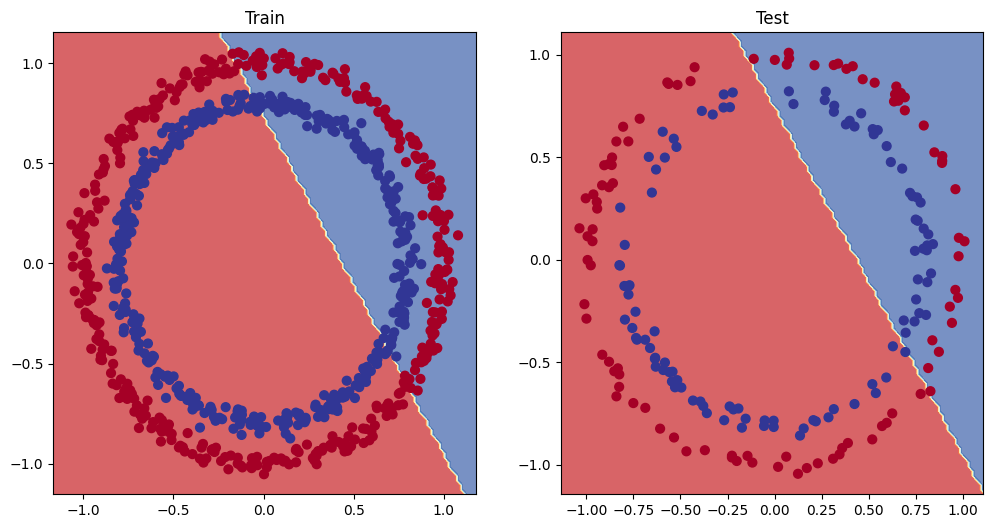

In [115]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Notes

Our model is predicting the data using a straight line. It indicates that it is an underfit. We need add more complexity to the model to detect complex decision boundary.

# Model Improvements

## Model Architecture V1

In [122]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)

        return x

model_1 = CircleModelV1().to(DEVICE)
print('Model Architecture')
print('------------------')
print(f'{model_1}')

print('\nModel Parameters')
print(f'--------------------------------')
for (name, param) in model_1.state_dict().items():
    print(f'{name}: {param}')

xt = torch.randn(2, 2, device=DEVICE)
yt = model_1(xt)

print('\nInputs and Outputs')
print('-------------------')
print(f'Input: {xt}')
print(f'Output: {yt}')
print(f'Input Shape: {xt.shape} Output Shape: {yt.shape}')

Model Architecture
------------------
CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Model Parameters
--------------------------------
layer_1.weight: tensor([[-0.7011, -0.5578],
        [-0.3029, -0.6690],
        [-0.0401, -0.6221],
        [ 0.3845,  0.3446],
        [ 0.1335,  0.5485],
        [-0.0693,  0.4235],
        [-0.4952, -0.1393],
        [-0.6305, -0.0574],
        [-0.4588,  0.6352],
        [ 0.4912,  0.5301]], device='mps:0')
layer_1.bias: tensor([ 0.2097, -0.4034,  0.6354, -0.6900, -0.4513, -0.4416, -0.2931,  0.1410,
        -0.5356, -0.5448], device='mps:0')
layer_2.weight: tensor([[-0.1512,  0.1930, -0.2281, -0.2836, -0.2741, -0.1556, -0.0831, -0.3135,
         -0.1481,  0.0061],
        [ 0.0521, -0.0453, -0.0359, -0.2057,  0.1620, -0.0762, -0.2162, -0.0762,
         -0.0442,  0.2924],
        [ 0.1648, -0

## Loss Function and Optmizier

In [123]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr=LR, params=model_1.parameters())

print('\nLoss Function: BCE')

print('\nOptimizer (SGD)')
print('------------------')
print(f'learning_rate: {LR}')


Loss Function: BCE

Optimizer (SGD)
------------------
learning_rate: 0.1


# Training V1

In [124]:
torch.manual_seed(SEED)

EPOCHS = 1000

print('Training Loop')
print('-------------')

for epoch in range(EPOCHS):
    ### Training
    model_1.train()

    # 1. Forward Pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Compute Loss and Accuracy
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred)

    # 3. Clear Optimizer Gradients
    optimizer.zero_grad()

    # 4. Backward Pass
    loss.backward()

    # 5. Update Weights
    optimizer.step()

    ### Evaluation
    model_1.eval()

    with torch.inference_mode():
        # 1. Forward Pass
        y_logits = model_1(X_test).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        # 2. Compute Loss and Accuracy
        val_loss = loss_fn(y_logits, y_test)
        val_accuracy = accuracy_fn(y_test, y_pred)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} Accuracy: {accuracy:.5f} | Val Loss: {val_loss:.5f} Val Accuracy: {val_accuracy:.5f}')

Training Loop
-------------
Epoch: 99 | Loss: 0.69282 Accuracy: 49.50000 | Val Loss: 0.69554 Val Accuracy: 41.50000
Epoch: 199 | Loss: 0.69280 Accuracy: 50.37500 | Val Loss: 0.69596 Val Accuracy: 41.50000
Epoch: 299 | Loss: 0.69279 Accuracy: 50.25000 | Val Loss: 0.69616 Val Accuracy: 42.50000
Epoch: 399 | Loss: 0.69279 Accuracy: 50.37500 | Val Loss: 0.69625 Val Accuracy: 42.50000
Epoch: 499 | Loss: 0.69279 Accuracy: 50.50000 | Val Loss: 0.69629 Val Accuracy: 42.50000
Epoch: 599 | Loss: 0.69279 Accuracy: 50.50000 | Val Loss: 0.69631 Val Accuracy: 42.50000
Epoch: 699 | Loss: 0.69279 Accuracy: 50.50000 | Val Loss: 0.69631 Val Accuracy: 42.50000
Epoch: 799 | Loss: 0.69279 Accuracy: 50.62500 | Val Loss: 0.69632 Val Accuracy: 42.50000
Epoch: 899 | Loss: 0.69279 Accuracy: 50.62500 | Val Loss: 0.69632 Val Accuracy: 42.50000
Epoch: 999 | Loss: 0.69279 Accuracy: 50.62500 | Val Loss: 0.69632 Val Accuracy: 42.50000


# Evaluate V1

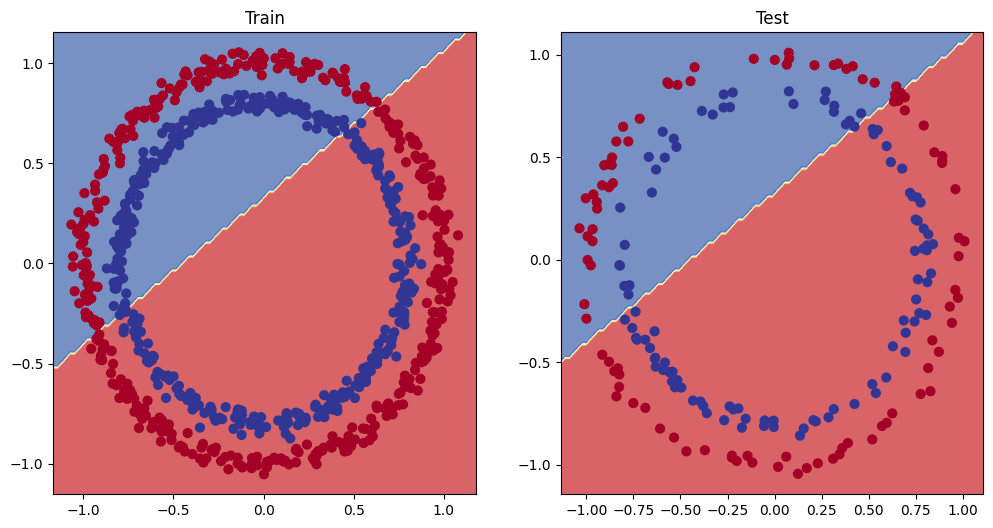

In [125]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Notes

The model performance hasn't improved with added complexity. It is unable to detect complex boundaries.

# Model With Non-Linearity

## Model Architecture V2

In [127]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)

        return x

model_2 = CircleModelV2().to(DEVICE)
print('Model Architecture')
print('------------------')
print(f'{model_2}')

print('\nModel Parameters')
print(f'--------------------------------')
for (name, param) in model_2.state_dict().items():
    print(f'{name}: {param}')

xt = torch.randn(2, 2, device=DEVICE)
yt = model_2(xt)

print('\nInputs and Outputs')
print('-------------------')
print(f'Input: {xt}')
print(f'Output: {yt}')
print(f'Input Shape: {xt.shape} Output Shape: {yt.shape}')

Model Architecture
------------------
CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

Model Parameters
--------------------------------
layer_1.weight: tensor([[ 0.6896,  0.1073],
        [ 0.6996,  0.6192],
        [-0.6054,  0.5323],
        [ 0.0242,  0.1792],
        [-0.2566, -0.5668],
        [ 0.0677,  0.1967],
        [ 0.3556, -0.5931],
        [-0.6842,  0.3365],
        [-0.1416, -0.0104],
        [-0.1835,  0.0015]], device='mps:0')
layer_1.bias: tensor([ 0.1168, -0.6530,  0.2608,  0.0778,  0.3265, -0.3652,  0.5146,  0.4715,
        -0.3551,  0.6191], device='mps:0')
layer_2.weight: tensor([[ 0.0407,  0.2792,  0.2875,  0.0496,  0.0511,  0.0990,  0.2031, -0.2888,
          0.0020,  0.3021],
        [-0.2233, -0.1781,  0.0331,  0.1143,  0.1699,  0.0178,  0.0746, -0.1433,
          0.2996, -0.2084],
   

## Loss Function and Optimizer

In [130]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr=LR, params=model_2.parameters())

print('\nLoss Function: BCE')

print('\nOptimizer (SGD)')
print('------------------')
print(f'learning_rate: {LR}')


Loss Function: BCE

Optimizer (SGD)
------------------
learning_rate: 0.1


# Training V2

In [131]:
torch.manual_seed(SEED)

EPOCHS = 1000

print('Training Loop')
print('-------------')

for epoch in range(EPOCHS):
    ### Training
    model_2.train()

    # 1. Forward Pass
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Compute Loss and Accuracy
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred)

    # 3. Clear Optimizer Gradients
    optimizer.zero_grad()

    # 4. Backward Pass
    loss.backward()

    # 5. Update Weights
    optimizer.step()

    ### Evaluation
    model_2.eval()

    with torch.inference_mode():
        # 1. Forward Pass
        y_logits = model_2(X_test).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        # 2. Compute Loss and Accuracy
        val_loss = loss_fn(y_logits, y_test)
        val_accuracy = accuracy_fn(y_test, y_pred)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} Accuracy: {accuracy:.5f} | Val Loss: {val_loss:.5f} Val Accuracy: {val_accuracy:.5f}')

Training Loop
-------------
Epoch: 99 | Loss: 0.68624 Accuracy: 56.75000 | Val Loss: 0.68592 Val Accuracy: 56.50000
Epoch: 199 | Loss: 0.68006 Accuracy: 67.00000 | Val Loss: 0.68098 Val Accuracy: 62.50000
Epoch: 299 | Loss: 0.66973 Accuracy: 66.75000 | Val Loss: 0.67204 Val Accuracy: 62.00000
Epoch: 399 | Loss: 0.65125 Accuracy: 74.62500 | Val Loss: 0.65643 Val Accuracy: 66.00000
Epoch: 499 | Loss: 0.61669 Accuracy: 85.87500 | Val Loss: 0.62714 Val Accuracy: 78.00000
Epoch: 599 | Loss: 0.55060 Accuracy: 94.75000 | Val Loss: 0.56592 Val Accuracy: 93.50000
Epoch: 699 | Loss: 0.43628 Accuracy: 98.50000 | Val Loss: 0.45459 Val Accuracy: 98.00000
Epoch: 799 | Loss: 0.29252 Accuracy: 99.25000 | Val Loss: 0.31598 Val Accuracy: 100.00000
Epoch: 899 | Loss: 0.17870 Accuracy: 99.87500 | Val Loss: 0.19774 Val Accuracy: 100.00000
Epoch: 999 | Loss: 0.15515 Accuracy: 98.12500 | Val Loss: 0.15902 Val Accuracy: 99.00000


# Evaluate V2

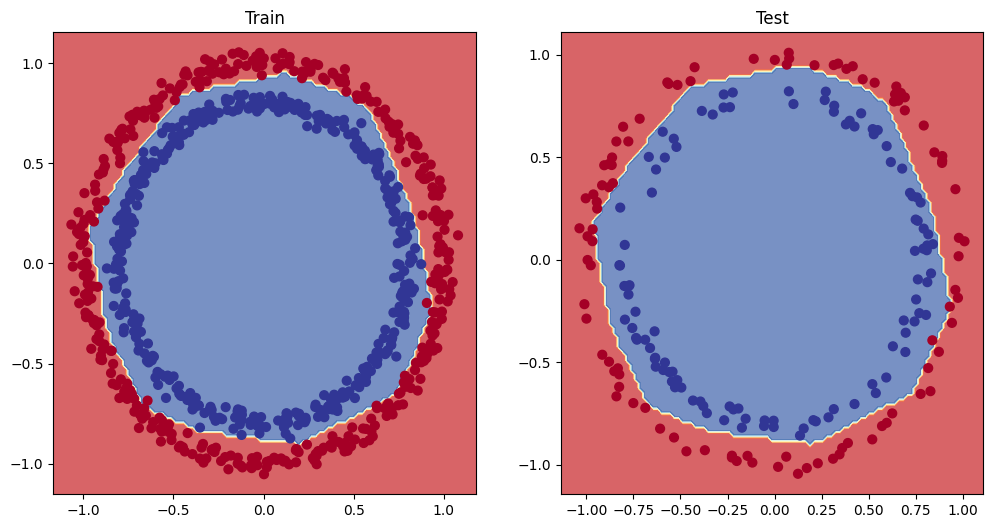

In [132]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

# Multi-class Classification

In this exercise, we'll adapt our model to predict more than two classes. Such a classification is called Multi-class Classification.

## Data Preparation

### Generation

In [138]:
N_SAMPLES, N_CLASSES, N_FEATURES = 1000, 4, 2

# 1. Create multi-class data
X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=N_FEATURES,
    centers=N_CLASSES,
    cluster_std=1.5,
    random_state=SEED
)

# 2. Convert data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

print('\nSamples')
print('--------')
print(f'X_blob.shape: {X_blob.shape} y_blob.shape: {y_blob.shape}')
print(f'\nX_blob[:5]: {X_blob[:5]}')
print(f'\ny_blob[:5]: {y_blob[:5]}')


Samples
--------
X_blob.shape: torch.Size([1000, 2]) y_blob.shape: torch.Size([1000])

X_blob[:5]: tensor([[-3.0553, -2.1491],
        [-6.8583,  2.0159],
        [ 8.4976,  7.3539],
        [ 0.1351,  7.0292],
        [-5.7987,  1.3541]])

y_blob[:5]: tensor([1, 1, 2, 0, 1])


### Exploration

In [139]:
blobs = pd.DataFrame({
    "X1": X_blob[:, 0],
    "X2": X_blob[:, 1],
    "label": y_blob
})

print('Samples')
display(blobs.head(10))

print('Label Counts')
print('------------')
display(blobs.label.value_counts())

Samples


,X1,X2,label
0,-3.055341,-2.149115,1
1,-6.858294,2.015940,1
2,8.497607,7.353924,2
3,0.135128,7.029197,0
4,-5.798709,1.354098,1
5,-4.939835,-8.044256,3
6,-5.309915,-7.660812,3
7,6.975302,7.933012,2
8,-3.990963,3.507197,1
9,-4.764405,1.694691,1


Label Counts
------------


label
1    250
2    250
0    250
3    250
Name: count, dtype: int64

### Visualization

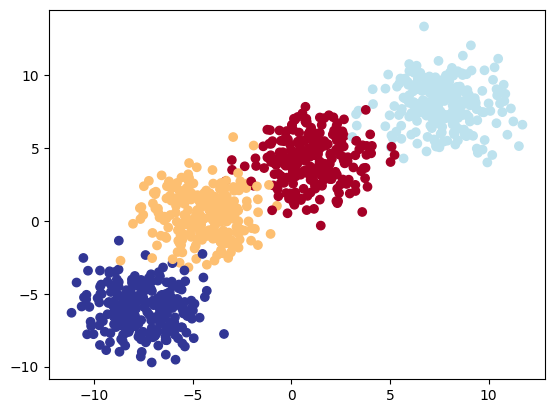

In [145]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Training and Test Splits

In [146]:
train_split, test_split = 0.8, 0.2

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=test_split,
    random_state=SEED
)

print('Training and Test Splits')
print('-------------------------')
print(f'X_blob_train: {len(X_blob_train)}')
print(f'y_blob_train: {len(y_blob_train)}')
print(f'\X_blob_test: {len(X_blob_test)}')
print(f'y_blob_test: {len(y_blob_test)}')

Training and Test Splits
-------------------------
X_blob_train: 800
y_blob_train: 800
\X_blob_test: 200
y_blob_test: 200


# Blob Model Design

## Blob Model Architecture

In [175]:
class BlobModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units=8):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=out_features), # how many classes are there?
        )

    def forward(self, x):
        return self.mlp(x)

model_3 = BlobModel(in_features=N_FEATURES, out_features=N_CLASSES).to(DEVICE)
print('Model Architecture')
print('------------------')
print(f'{model_3}')

print('\nModel Parameters')
print(f'--------------------------------')
for (name, param) in model_3.state_dict().items():
    print(f'{name}: {param}')

xt = torch.randn(2, 2, device=DEVICE)
yt = model_3(xt)

print('\nInputs and Outputs')
print('-------------------')
print(f'Input Shape: {xt.shape} Output Shape: {yt.shape}')
print(f'Input: {xt}')
print(f'Output: {yt}')

Model Architecture
------------------
BlobModel(
  (mlp): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

Model Parameters
--------------------------------
mlp.0.weight: tensor([[ 0.3555, -0.1704],
        [-0.5305,  0.1383],
        [ 0.3256,  0.4112],
        [-0.6653, -0.0936],
        [-0.6813,  0.0087],
        [ 0.0312,  0.2301],
        [-0.2427, -0.1033],
        [ 0.1735, -0.6849]], device='mps:0')
mlp.0.bias: tensor([ 0.3478,  0.6835, -0.5032,  0.6896,  0.1073,  0.6996,  0.6192, -0.6054],
       device='mps:0')
mlp.1.weight: tensor([[ 0.2662,  0.0121,  0.0896, -0.1283, -0.2834,  0.0338,  0.0984,  0.1778],
        [-0.2966, -0.3421,  0.1682, -0.0708, -0.0052, -0.0917,  0.0007,  0.0584],
        [-0.3265,  0.1304,  0.0389,  0.1632, -0.1826,  0.2573,  0.2358, -0.1776],
        [ 0.3096,  0.0455,  0.3121,  0.3214,  0.0554,  0.0572,  0.11

## Untrained Predictions

In [151]:
untrained_preds = model_3(X_blob_test.to(DEVICE))

print('Untrained Predictions')
print('--------------------')
print(f'X_test.shape: {X_blob_test.shape}')
print(f'Predictions: {untrained_preds.shape}')
print(f'y_test.shape: {y_blob_test.shape}')
print(f'Predictions[:10]: {untrained_preds[:10]}')
print(f'y_test[:10]: {y_blob_test[:10]}')

Untrained Predictions
--------------------
X_test.shape: torch.Size([200, 2])
Predictions: torch.Size([200, 4])
y_test.shape: torch.Size([200])
Predictions[:10]: tensor([[-0.5047,  0.9091, -0.6138, -0.1234],
        [-0.7379,  1.0898, -0.7620, -0.2183],
        [-1.4138,  1.7652, -1.2630, -0.5780],
        [ 0.5057,  2.9316, -1.2993, -1.2780],
        [-0.4568,  0.9077, -0.6003, -0.1239],
        [ 0.0050,  2.0693, -1.0258, -0.7840],
        [-0.2106,  2.6206, -1.3445, -1.0861],
        [ 0.2081, -0.5003,  0.2444,  0.6449],
        [-1.2140,  1.3263, -1.0017, -0.3381],
        [-1.1070,  1.3931, -1.0046, -0.3782]], device='mps:0',
       grad_fn=<SliceBackward0>)
y_test[:10]: tensor([1, 1, 1, 3, 1, 3, 3, 0, 1, 1])


## Loss Function and Optimizer

In [176]:
LR = 0.1

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr=LR, params=model_3.parameters())

# Training Blob Model

## Model Output to Target Classes

In [171]:
y_logits = model_3(X_blob_test[:5].to(DEVICE))

y_pred_probs = y_logits.softmax(dim=-1)
y_pred = y_pred_probs.argmax(dim=-1)
accuracy = accuracy_fn(y_blob_test[:5].to(DEVICE), y_pred)

print('\nModel Output to Target Classes')
print('-------------------------------')
print(f'Logits: {y_logits}')
print(f'Probabilities: {y_pred_probs}')
print(f'Assignments: {y_pred}')
print(f'Labels: {y_blob_test[:5]}')
print(f'Accuracy: {accuracy}')


Model Output to Target Classes
-------------------------------
Logits: tensor([[-0.0932, -0.2854,  0.2868,  0.5765],
        [-0.0739, -0.3955,  0.2539,  0.6536],
        [-0.0419, -0.7868, -0.0199,  0.9770],
        [-0.6158, -1.1461, -2.8785,  2.0965],
        [-0.1027, -0.2798,  0.2514,  0.5843]], device='mps:0',
       grad_fn=<LinearBackward0>)
Probabilities: tensor([[0.1908, 0.1574, 0.2790, 0.3728],
        [0.1929, 0.1399, 0.2678, 0.3994],
        [0.1899, 0.0901, 0.1941, 0.5259],
        [0.0597, 0.0351, 0.0062, 0.8990],
        [0.1905, 0.1596, 0.2714, 0.3786]], device='mps:0',
       grad_fn=<SoftmaxBackward0>)
Assignments: tensor([3, 3, 3, 3, 3], device='mps:0')
Labels: tensor([1, 1, 1, 3, 1], device='mps:0')
Accuracy: 20.0


## Loop

In [177]:
torch.manual_seed(SEED)

EPOCHS = 100

X_blob_train, y_blob_train = X_blob_train.to(DEVICE), y_blob_train.to(DEVICE)
X_blob_test, y_blob_test = X_blob_test.to(DEVICE), y_blob_test.to(DEVICE)

print('Training Loop')
print('-------------')

for epoch in range(EPOCHS):
    ### Training
    model_3.train()

    # 1. Forward Pass
    y_logits = model_3(X_blob_train)
    y_pred_probs = y_logits.softmax(dim=-1)
    y_pred = y_pred_probs.argmax(dim=-1)

    # 2. Compute Loss and Accuracy
    loss = loss_fn(y_pred_probs, y_blob_train)
    accuracy = accuracy_fn(y_blob_train, y_pred)

    # 3. Clear Optimizer Gradients
    optimizer.zero_grad()

    # 4. Backward Pass
    loss.backward()

    # 5. Update Weights
    optimizer.step()

    ### Evaluation
    model_3.eval()

    with torch.inference_mode():
        # 1. Forward Pass
        y_logits = model_3(X_blob_test)
        y_pred_probs = y_logits.softmax(dim=-1)
        y_pred = y_pred_probs.argmax(dim=-1)

        # 2. Compute Loss and Accuracy
        val_loss = loss_fn(y_pred_probs, y_blob_test)
        val_accuracy = accuracy_fn(y_blob_test, y_pred)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} Accuracy: {accuracy:.5f} | Val Loss: {val_loss:.5f} Val Accuracy: {val_accuracy:.5f}')

Training Loop
-------------
Epoch: 9 | Loss: 1.11801 Accuracy: 68.75000 | Val Loss: 1.10696 Val Accuracy: 65.50000
Epoch: 19 | Loss: 1.05251 Accuracy: 69.75000 | Val Loss: 1.04916 Val Accuracy: 71.00000
Epoch: 29 | Loss: 1.02261 Accuracy: 72.00000 | Val Loss: 1.01888 Val Accuracy: 72.00000
Epoch: 39 | Loss: 0.99450 Accuracy: 72.50000 | Val Loss: 0.98721 Val Accuracy: 73.00000
Epoch: 49 | Loss: 0.94879 Accuracy: 86.12500 | Val Loss: 0.93667 Val Accuracy: 90.00000
Epoch: 59 | Loss: 0.90292 Accuracy: 93.50000 | Val Loss: 0.89397 Val Accuracy: 93.00000
Epoch: 69 | Loss: 0.87595 Accuracy: 93.87500 | Val Loss: 0.87029 Val Accuracy: 93.50000
Epoch: 79 | Loss: 0.85902 Accuracy: 94.37500 | Val Loss: 0.85550 Val Accuracy: 93.00000
Epoch: 89 | Loss: 0.84744 Accuracy: 94.37500 | Val Loss: 0.84553 Val Accuracy: 93.00000
Epoch: 99 | Loss: 0.83905 Accuracy: 94.50000 | Val Loss: 0.83845 Val Accuracy: 93.00000


# Evaluate Blob Model

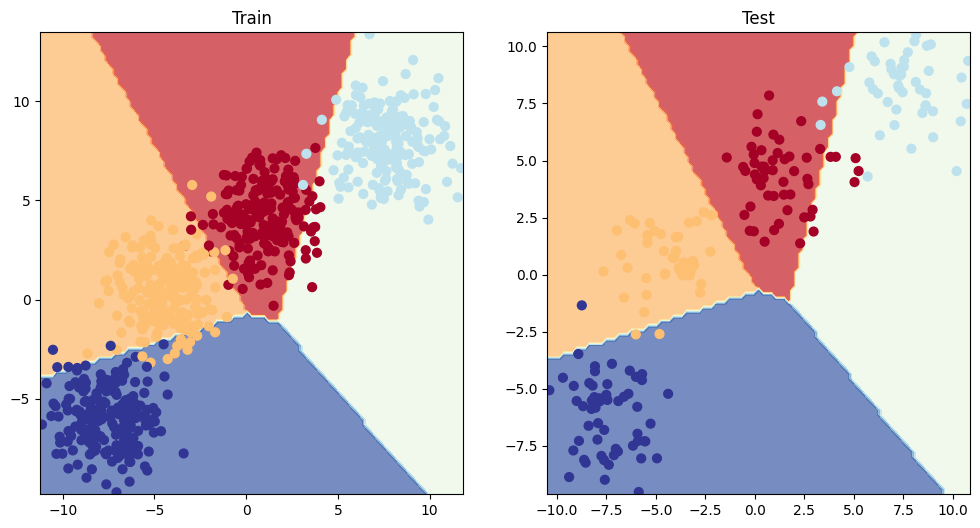

In [178]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)